# Creation of recovered data (alt)

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display

## 1. Creation of the array with the recovered values in time

In [2]:
# Reading confirmed raw file as dictionary
df = pd.read_excel('Spain_OWID_Confirmed_Deaths.xlsx')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,ESP,Europe,Spain,2020-01-22,0,0.0,0,0.0
1,ESP,Europe,Spain,2020-01-23,0,0.0,0,0.0
2,ESP,Europe,Spain,2020-01-24,0,0.0,0,0.0
3,ESP,Europe,Spain,2020-01-25,0,0.0,0,0.0
4,ESP,Europe,Spain,2020-01-26,0,0.0,0,0.0


In [3]:
# Obtaining the deaths values since the beginning
T_deaths_original = df.values[:,6]

T_deaths_original[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3,
       5, 10, 17, 28, 35, 54], dtype=object)

In [4]:
# Creation of New Deaths (Death[t] - Death[t-1])

N_deaths = np.empty(len(T_deaths_original), dtype = object)
N_deaths[0] = 0  # First value is 0
for i in range(1, len(N_deaths)):
    result = T_deaths_original[i] - T_deaths_original[i-1]
    if result >= 0:
        N_deaths[i] = result
    else:
        N_deaths[i] = 0

N_deaths.shape, N_deaths

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        2, 5, 7, 11, 7, 19, 1, 78, 62, 94, 53, 191, 90, 207, 213, 332, 397,
        539, 497, 839, 718, 773, 844, 821, 913, 748, 923, 961, 850, 749,
        694, 700, 704, 747, 655, 634, 525, 603, 547, 300, 652, 607, 687,
        41, 410, 399, 430, 435, 440, 367, 378, 288, 331, 301, 453, 268, 0,
        557, 164, 164, 185, 244, 213, 229, 179, 143, 123, 176, 184, 217,
        138, 104, 0, 146, 69, 110, 52, 688, 50, 74, 0, 283, 0, 2, 2, 4, 2,
        0, 0, 1, 5, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1179, 7, 1,
        1, 1, 2, 3, 8, 3, 2, 3, 9, 9, 4, 17, 0, 0, 3, 4, 4, 5, 2, 0, 0, 3,
        3, 4, 3, 4, 0, 0, 2, 2, 2, 3, 3, 0, 0, 2, 2, 5, 2, 2, 0, 0, 27, 26,
        1, 1, 3, 0, 0, 73, 5, 0, 26, 12, 0, 0, 29, 24, 127, 16, 25, 0, 0,
        34, 52, 47, 25, 15, 0, 0, 83, 58, 42, 40, 184, 0, 0, 98, 78, 34,
        71, 48, 0, 0, 101,

In [5]:
# Creation of Fixed Total Deaths (Accumulative sum of N_deaths array)
T_deaths_fix = np.empty(len(T_deaths_original), dtype = object)
T_deaths_fix[0] = 0

sum_T = 0
for i in range(1, len(T_deaths_original)):
    sum_T = sum_T + N_deaths[i]
    T_deaths_fix[i] = sum_T

T_deaths_fix.shape, T_deaths_fix

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3,
        5, 10, 17, 28, 35, 54, 55, 133, 195, 289, 342, 533, 623, 830, 1043,
        1375, 1772, 2311, 2808, 3647, 4365, 5138, 5982, 6803, 7716, 8464,
        9387, 10348, 11198, 11947, 12641, 13341, 14045, 14792, 15447,
        16081, 16606, 17209, 17756, 18056, 18708, 19315, 20002, 20043,
        20453, 20852, 21282, 21717, 22157, 22524, 22902, 23190, 23521,
        23822, 24275, 24543, 24543, 25100, 25264, 25428, 25613, 25857,
        26070, 26299, 26478, 26621, 26744, 26920, 27104, 27321, 27459,
        27563, 27563, 27709, 27778, 27888, 27940, 28628, 28678, 28752,
        28752, 29035, 29035, 29037, 29039, 29043, 29045, 29045, 29045,
        29046, 29051, 29052, 29053, 29054, 29054, 29054, 29054, 29054,
        29054, 29054, 29054, 29054, 29054, 29054, 29054, 30233, 30240,
        30241, 30242, 30243, 30245, 30248, 30256, 30259

In [6]:
# Reading file as dictionary
df = pd.read_excel('Spain_OWID_Confirmed_Deaths.xlsx')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,ESP,Europe,Spain,2020-01-22,0,0.0,0,0.0
1,ESP,Europe,Spain,2020-01-23,0,0.0,0,0.0
2,ESP,Europe,Spain,2020-01-24,0,0.0,0,0.0
3,ESP,Europe,Spain,2020-01-25,0,0.0,0,0.0
4,ESP,Europe,Spain,2020-01-26,0,0.0,0,0.0


In [7]:
# Obtaining the confirmed values since the beginning
T_cases_original = df.values[:,4]
N_cases_original = df.values[:,5]

T_cases_original[0:20], N_cases_original[0:20]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2],
       dtype=object),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], dtype=object))

In [8]:
# Creation of New Confirmed (Confirmed[t] - Confirmed[t-1])

N_confirmed = np.empty(len(T_cases_original), dtype = object)
N_confirmed[0] = 0  # First value is 0
for i in range(1, len(N_confirmed)):
    result = T_cases_original[i] - T_cases_original[i-1]
    if result >= 0:
        N_confirmed[i] = result
    else:
        N_confirmed[i] = 0

N_confirmed.shape, N_confirmed

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 2, 17, 13, 39, 36, 45,
        57, 37, 141, 100, 173, 400, 622, 582, 0, 2955, 1159, 1407, 2144,
        1806, 2162, 4053, 2447, 4964, 3394, 6368, 4749, 9630, 8271, 7933,
        7516, 6875, 7846, 7967, 8195, 7947, 7134, 6969, 5478, 5029, 5267,
        6278, 5002, 5051, 4754, 3804, 3268, 2442, 5103, 7304, 5891, 887,
        6948, 1536, 3968, 4211, 4635, 0, 2915, 1729, 1831, 1308, 2144, 518,
        1781, 1366, 884, 545, 1318, 996, 1122, 1410, 721, 772, 3086, 594,
        661, 849, 643, 515, 0, 908, 431, 518, 482, 1787, 466, 482, 0, 859,
        0, 1647, 658, 664, 251, 159, 294, 394, 334, 318, 332, 240, 167,
        249, 314, 427, 502, 396, 323, 181, 219, 355, 585, 307, 363, 334,
        232, 248, 334, 400, 419, 564, 301, 200, 301, 388, 444, 442, 0, 0,
        1244, 341, 383, 543, 852, 0, 0, 2045, 666, 875, 1361, 1400, 0, 0,
        4581, 1358, 1357, 2615, 

In [9]:
# Creation of Fixed Total Confirmed (Accumulative sum of N_confirmed array)
T_confirmed_fix = np.empty(len(N_confirmed), dtype = object)
T_confirmed_fix[0] = 0

sum_T = 0
for i in range(1, len(N_confirmed)):
    sum_T = sum_T + N_confirmed[i]
    T_confirmed_fix[i] = sum_T

T_confirmed_fix.shape, T_confirmed_fix

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 13, 15, 32, 45, 84, 120,
        165, 222, 259, 400, 500, 673, 1073, 1695, 2277, 2277, 5232, 6391,
        7798, 9942, 11748, 13910, 17963, 20410, 25374, 28768, 35136, 39885,
        49515, 57786, 65719, 73235, 80110, 87956, 95923, 104118, 112065,
        119199, 126168, 131646, 136675, 141942, 148220, 153222, 158273,
        163027, 166831, 170099, 172541, 177644, 184948, 190839, 191726,
        198674, 200210, 204178, 208389, 213024, 213024, 215939, 217668,
        219499, 220807, 222951, 223469, 225250, 226616, 227500, 228045,
        229363, 230359, 231481, 232891, 233612, 234384, 237470, 238064,
        238725, 239574, 240217, 240732, 240732, 241640, 242071, 242589,
        243071, 244858, 245324, 245806, 245806, 246665, 246665, 248312,
        248970, 249634, 249885, 250044, 250338, 250732, 251066, 251384,
        251716, 251956, 252123, 252372, 252686

In [10]:
# Creation of Fixed Total Alive Confirmed (Accumulative sum of N_confirmed array - Total Deaths)
T_confirmed_alive_fix = np.empty(len(T_confirmed_fix), dtype = object)

for i in range(0, len(T_confirmed_fix)):
    T_confirmed_alive_fix[i] = T_confirmed_fix[i] - T_deaths_fix[i]

T_confirmed_alive_fix.shape, T_confirmed_alive_fix

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 13, 15, 32, 45, 84, 120,
        164, 220, 256, 395, 490, 656, 1045, 1660, 2223, 2222, 5099, 6196,
        7509, 9600, 11215, 13287, 17133, 19367, 23999, 26996, 32825, 37077,
        45868, 53421, 60581, 67253, 73307, 80240, 87459, 94731, 101717,
        108001, 114221, 119005, 123334, 127897, 133428, 137775, 142192,
        146421, 149622, 152343, 154485, 158936, 165633, 170837, 171683,
        178221, 179358, 182896, 186672, 190867, 190500, 193037, 194478,
        195978, 196985, 198676, 198926, 200707, 201516, 202236, 202617,
        203750, 204502, 205411, 206592, 207134, 207763, 210726, 211144,
        211621, 212253, 212758, 213169, 213169, 213931, 214293, 214701,
        215131, 216230, 216646, 217054, 217054, 217630, 217630, 219275,
        219931, 220591, 220840, 220999, 221293, 221686, 222015, 222332,
        222663, 222902, 223069, 223318, 223632,

In [11]:
# Estimation Recovered Accumulated

Ac_recovered = np.empty(len(T_confirmed_fix), dtype = object)

# First 10 values
for i in range(0, 14, 1):
    Ac_recovered[i] = 0

for i in range(14, len(T_confirmed_fix), 1):
    Ac_recovered[i] = T_confirmed_alive_fix[i-14]

# Ac_recovered.shape, Ac_recovered[0:20], Ac_recovered[-10:-1], Ac_recovered[-1]
Ac_recovered.shape, Ac_recovered[0:200], Ac_recovered[-10:-1], Ac_recovered[-1]

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 6, 13, 15, 32, 45, 84, 120, 164, 220, 256, 395, 490,
        656, 1045, 1660, 2223, 2222, 5099, 6196, 7509, 9600, 11215, 13287,
        17133, 19367, 23999, 26996, 32825, 37077, 45868, 53421, 60581,
        67253, 73307, 80240, 87459, 94731, 101717, 108001, 114221, 119005,
        123334, 127897, 133428, 137775, 142192, 146421, 149622, 152343,
        154485, 158936, 165633, 170837, 171683, 178221, 179358, 182896,
        186672, 190867, 190500, 193037, 194478, 195978, 196985, 198676,
        198926, 200707, 201516, 202236, 202617, 203750, 204502, 205411,
        206592, 207134, 207763, 210726, 211144, 211621, 212253, 212758,
        213169, 213169, 213931, 214293, 214701, 215131, 216230, 216646,
        217054, 217054, 217630, 217630, 219275, 219931, 220591, 220840,
        220999, 221293, 221686, 222015, 22233

In [12]:
# Recovered Smooth Accumulated (14 days - 7 days average)

Ac_recovered_smooth = np.empty(len(Ac_recovered)-6, dtype = object)  # 6 first values are not available
for i in range(0, len(Ac_recovered)-6):
    sum_Ac = 0
    for j in range(i, i+7):
        sum_Ac = sum_Ac + Ac_recovered[j]
    Ac_recovered_smooth[i] = (sum_Ac/7)

Ac_recovered_smooth.shape, Ac_recovered_smooth

((787,),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.2857142857142857,
        0.42857142857142855, 0.5714285714285714, 0.7142857142857143,
        0.8571428571428571, 1.0, 1.0, 1.1428571428571428,
        1.2857142857142858, 1.4285714285714286, 1.5714285714285714,
        1.7142857142857142, 1.8571428571428572, 2.0, 2.0, 2.0, 2.0, 2.0,
        2.0, 2.0, 2.0, 2.0, 2.0, 2.5714285714285716, 4.142857142857143,
        6.0, 10.285714285714286, 16.428571428571427, 28.142857142857142,
        45.0, 67.57142857142857, 97.14285714285714, 131.57142857142858,
        183.42857142857142, 247.0, 328.7142857142857, 460.85714285714283,
        674.5714285714286, 960.7142857142857, 1241.5714285714287,
        1913.5714285714287, 2728.714285714286, 3707.714285714286,
        4929.857142857143, 6294.857142857143, 7875.428571428572,
        10005.57142857143, 12043.857142857143, 14587.142857142857, 17371.0,
        2068

## 2. Creation of the final dataset

In [13]:
# Reading confirmed file as dictionary, to extract some columns
df = pd.read_csv('Confirmed_Spain.csv')
df.head()

,ISO_code,Continent,Country/Region,Date,Total Confirmed Original,New Confirmed,New Confirmed Smooth (7 days),Total Confirmed Fixed (sum New Confirmed),Total Alive Confirmed Fixed (sum New Confirmed - Total Deaths),Accumulated Alive Confirmed in 14 days,Accumulated Alive Confirmed Smooth in 14 days
0,ESP,Europe,Spain,2020-01-28,0,0,0.000000,0,0,0,0.000000
1,ESP,Europe,Spain,2020-01-29,0,0,0.000000,0,0,0,0.000000
2,ESP,Europe,Spain,2020-01-30,0,0,0.000000,0,0,0,0.000000
3,ESP,Europe,Spain,2020-01-31,0,0,0.000000,0,0,0,0.000000
4,ESP,Europe,Spain,2020-02-01,1,1,0.142857,1,1,1,0.142857


In [14]:
# Arrays which will form the final dataframe of Recovered
iso_code = df.values[:, 0]
continent = df.values[:, 1]
region = df.values[:, 2]
dates = df.values[:, 3]

iso_code[0:5], continent[0:5], region[0:5], dates[0:5]

(array(['ESP', 'ESP', 'ESP', 'ESP', 'ESP'], dtype=object),
 array(['Europe', 'Europe', 'Europe', 'Europe', 'Europe'], dtype=object),
 array(['Spain', 'Spain', 'Spain', 'Spain', 'Spain'], dtype=object),
 array(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
        '2020-02-01'], dtype=object))

In [15]:
# Array concatenation for building the final dataframe

columns = 6  # Number of columns
X_total = np.empty((len(Ac_recovered_smooth), columns), dtype = object)

for i in range(len(Ac_recovered_smooth)):
    X_total[i] = [iso_code[i], continent[i], region[i], dates[i],
                  Ac_recovered[i+6], Ac_recovered_smooth[i]]
    
X_total.shape, X_total[0:10]

((787, 6),
 array([['ESP', 'Europe', 'Spain', '2020-01-28', 0, 0.0],
        ['ESP', 'Europe', 'Spain', '2020-01-29', 0, 0.0],
        ['ESP', 'Europe', 'Spain', '2020-01-30', 0, 0.0],
        ['ESP', 'Europe', 'Spain', '2020-01-31', 0, 0.0],
        ['ESP', 'Europe', 'Spain', '2020-02-01', 0, 0.0],
        ['ESP', 'Europe', 'Spain', '2020-02-02', 0, 0.0],
        ['ESP', 'Europe', 'Spain', '2020-02-03', 0, 0.0],
        ['ESP', 'Europe', 'Spain', '2020-02-04', 0, 0.0],
        ['ESP', 'Europe', 'Spain', '2020-02-05', 0, 0.0],
        ['ESP', 'Europe', 'Spain', '2020-02-06', 0, 0.0]], dtype=object))

In [16]:
# Labels of each column of the dataframe
labels = ['ISO_code', 'Continent', 'Country/Region', 'Date',
          'Total Recovered', 'Total Recovered Smooth (7 days)']

In [17]:
# Creation of the final dataframe
df_recovered = pd.DataFrame(data=X_total, columns=labels)
df_recovered

,ISO_code,Continent,Country/Region,Date,Total Recovered,Total Recovered Smooth (7 days)
0,ESP,Europe,Spain,2020-01-28,0,0
1,ESP,Europe,Spain,2020-01-29,0,0
2,ESP,Europe,Spain,2020-01-30,0,0
3,ESP,Europe,Spain,2020-01-31,0,0
4,ESP,Europe,Spain,2020-02-01,0,0
...,...,...,...,...,...,...
782,ESP,Europe,Spain,2022-03-20,11082931,1.10468e+07
783,ESP,Europe,Spain,2022-03-21,11118767,1.10693e+07
784,ESP,Europe,Spain,2022-03-22,11141631,1.10868e+07
785,ESP,Europe,Spain,2022-03-23,11163434,1.11048e+07


In [18]:
# Export dataframe to a csv file

from pathlib import Path  
filepath = Path('Recovered_Spain.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_recovered.to_csv(filepath, index=False)

Text(0.5, 1.0, 'Recovered Estimated')

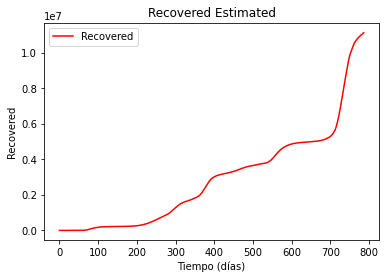

In [19]:
plt.plot(range(0, len(Ac_recovered_smooth)), Ac_recovered_smooth, 'r', label="Recovered")
plt.xlabel("Tiempo (días)")
plt.ylabel("Recovered")
plt.legend()

plt.title("Recovered Estimated")